## Training a Classification Neural Network Model with Keras in Tensorflow

In this exercise, we will implement an artificial neural network used for binary classification with three hidden layers and using stochastic gradient descent.

For more information about Keras, consult the [online documentation](https://keras.io/api/).
Tensorflow is a general purpose high-performance computing language which Keras is built on top of to allow us to easily define and train neural networks.

To get started, let us import Keras, along with other libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

### Create and Visualize a Data Set

We will create some data to use for training and testing.

Our data set will consist of 600 data points. Each data point contains two features and one label. The label is either 0 or 1. In this example, we created our data set to contain 300 data points belonging to class 0 and 300 data points belonging to class 1.

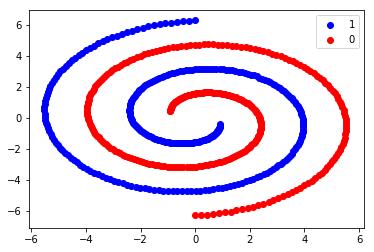

In [2]:
# The data set contains 600 data points total
# 300 in class 0 
# 300 in class 1

N = 300
r = np.linspace(1,2*np.pi,N)
x1 = np.array([np.sin(2.*r)*r, np.cos(2*r)*r]).T
x2 = np.array([np.sin(2.*r+np.pi)*r, np.cos(2*r+np.pi)*r]).T
X = np.concatenate([x1, x2], axis=0)
y = np.concatenate([np.ones(N), 0 * np.ones(N)])

# Visualize data
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b')
plt.scatter(X[y != 1, 0], X[y != 1, 1], c='r')
plt.legend(["1","0"])
plt.show()

### Create Training & Test Data Sets
We will now use `sklearn` to split our data set into training and test data sets

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

The code cells below follow these 5 simple steps to train the model on data:

1. Define the model structure
2. Define a loss function
3. Define an optimizer
4. Compile the model
5. Train the network
6. Evaluate the model

### Step 1. Define Model Structure

To create a neural network in Keras we have to specify the type and width of each hidden layer as well as the transition function utilized. Below we create a network with 3 hidden layers of width 64, 32, and 16 and utilizing the ReLu transition function.

In [4]:
model = keras.Sequential()

hidden_layer_1 = keras.layers.Dense(64, input_shape=(2,), activation='relu', name='fc1')
model.add(hidden_layer_1)

hidden_layer_2 = keras.layers.Dense(32, activation='relu', name='fc2')
model.add(hidden_layer_2)

hidden_layer_3 = keras.layers.Dense(16, activation='relu', name='fc3')
model.add(hidden_layer_3)

output_layer = keras.layers.Dense(2, activation=None, name='fc4')
model.add(output_layer)

# Display the model's parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 64)                192       
_________________________________________________________________
fc2 (Dense)                  (None, 32)                2080      
_________________________________________________________________
fc3 (Dense)                  (None, 16)                528       
_________________________________________________________________
fc4 (Dense)                  (None, 2)                 34        
Total params: 2,834
Trainable params: 2,834
Non-trainable params: 0
_________________________________________________________________


`model.summary()` is an incredibly useful tool. It also shows the number of parameters per layer. 

For example, since the first layer is $64$ units and the input dimension is $2$, the first weight matrix $\mathbf{W}_1$ must be of shape $2 \times 64$. Recall that the ReLu function is $\mathbf{Z}_1 = \sigma(\mathbf{W}_1 x + b)$ where $x$ is one input point and $b$ is the bias vector added after matrix multiplication of $\mathbf{W}_1$ with $x$. To match dimensions, the vectors $b$ and $\mathbf{W}_1 x$ must be of equal length, i.e., $64$. Hence, how many parameters does the first layer have in total?

Well, it is $2 \times 64 + 64 = 192$, which we see in the summary table. Likewise, the second layer has $64 \times 32 + 32 = 2080$ parameters, and so on.

### Step 2. Define the Optimization Function

As our optimizer we will use stochastic gradient descent (SGD) with a learning rate of 0.1.

In [5]:
optimizer = keras.optimizers.SGD(learning_rate=0.1)

### Step 3. Define the loss function

Since we are doing a classification problem, we are going to use cross entropy loss. We will use the `SparseCategoricalCrossentropy` loss function since `y` contains integer labels (0 and 1).
Since the outputs will be not normalized between 0 and 1, we specify `from_logits=True`. For more information on cross entropy loss functions in Keras visit the [online documentation](https://keras.io/api/losses/probabilistic_losses/).

In [6]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

### Step 4. Compile the model

Now we need to package the network architecture with the optimizer and the loss function and to do this we use the `.compile()` method. Notice we are also including the `metrics` parameter. This is a list of metrics to be evaluated by the model during training and testing. We will specify `accuracy` since we would like to obtain the accuracy score.

In [7]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

### Step 5. Train the model

We are almost ready to train. By default, Keras outputs loss and metrics at the end of every epoch. So instead, we use a custom logger function to only output every 50 epochs.

In [8]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

Now we can run the `.fit()` method on our model to learn parameters from the training data. Notice we are adding our logger function to the list of callbacks.

In [9]:
num_epochs = 1000

history = model.fit(
    x_train,
    y_train,
    epochs=num_epochs,
    verbose=0, # disable the default progress bar
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=50)],
)

Epoch [50/ 1000], Loss: 0.5796, Accuracy: 0.6714
Epoch [100/ 1000], Loss: 0.1327, Accuracy: 0.9667
Epoch [150/ 1000], Loss: 0.0025, Accuracy: 1.0000
Epoch [200/ 1000], Loss: 0.0011, Accuracy: 1.0000
Epoch [250/ 1000], Loss: 0.0006, Accuracy: 1.0000
Epoch [300/ 1000], Loss: 0.0004, Accuracy: 1.0000
Epoch [350/ 1000], Loss: 0.0003, Accuracy: 1.0000
Epoch [400/ 1000], Loss: 0.0003, Accuracy: 1.0000
Epoch [450/ 1000], Loss: 0.0002, Accuracy: 1.0000
Epoch [500/ 1000], Loss: 0.0002, Accuracy: 1.0000
Epoch [550/ 1000], Loss: 0.0002, Accuracy: 1.0000
Epoch [600/ 1000], Loss: 0.0001, Accuracy: 1.0000
Epoch [650/ 1000], Loss: 0.0001, Accuracy: 1.0000
Epoch [700/ 1000], Loss: 0.0001, Accuracy: 1.0000
Epoch [750/ 1000], Loss: 0.0001, Accuracy: 1.0000
Epoch [800/ 1000], Loss: 0.0001, Accuracy: 1.0000
Epoch [850/ 1000], Loss: 0.0001, Accuracy: 1.0000
Epoch [900/ 1000], Loss: 0.0001, Accuracy: 1.0000
Epoch [950/ 1000], Loss: 0.0001, Accuracy: 1.0000
Epoch [1000/ 1000], Loss: 0.0001, Accuracy: 1.0000


### Step 6. Evaluate the Model

Let us visualize the training loss over time:

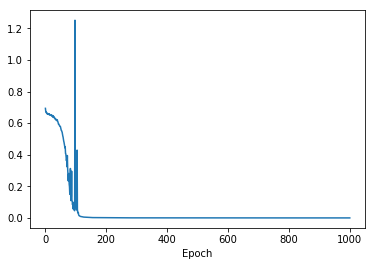

In [10]:
# visualize the training loss over time
training_losses = history.history['loss']

plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.show()

Keras makes the process of evaluating our model very easy. Recall that when we compiled the model we specified the metric we wanted to use to evaluate the model: accuracy. The keras method `.evaluate()` will return the loss and accuracy score of our model on our test data:

In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

Loss:  0.0002018569502979517 Accuracy:  1.0


Classification problems output belief vectors, also known as logits. Every element in the belief vector corresponds to the model's belief that the input example belongs to a certain class. For example, imagine we have a 5-class classification problem with labels {0, 1, 2, 3, 4}. Our model will output a 5-dimensional belief vector. If the 𝑗th element of this vector has the highest value, then the model believes that that data point belongs to class 𝑗.

We are working with binary classification, so for each data point, the model will output a 2-dimensional belief vector. The element (element 0 or element 1) in the two dimensional vector that has the highest value is the class (class 0 or class 1) that the model believes the data point belongs to.

In the cell below, we will make a prediction on our test set using the `.predict()` method, receive an output of logits, and then apply the `.argmax(axis=1)` method to get the predicted class for each data point.

For the first 5 data points, we will output their 2-dimensional belief vectors and the corresponding classes. Examine the output to see how this works.

In [13]:
# Evaluate the network
# Make predictions on the test set
logits = model.predict(x_test)
pred = logits.argmax(axis = 1)

print("Predictions for the first 5 data points:")
print("Logits\t\t\tClass")
for i in range(0,5):
    print(str(logits[i]) + "\t" + str(pred[i]))

Predictions for the first 5 data points:
Logits			Class
[ 2.9251478 -6.635536 ]	0
[ 5.809343 -5.216757]	0
[ 2.0649664 -7.442024 ]	0
[ 3.3239489 -6.95391  ]	0
[-5.563294  4.618438]	1


Although we already computed the accuracy score using the `.evaluate()` method, we can verify the accuracy by comparing our resulting predictions to the labels contained in our test set `y_test`.

In [14]:
acc = np.equal(pred,y_test).mean()
print('Test Accuracy is {:.4f}'. format(acc))

Test Accuracy is 1.0000


### Step 7. Visualize the Learned Decision Boundaries

Finally, since this example is a binary classification problem, we can visualize the decision boundaries that the model learned:

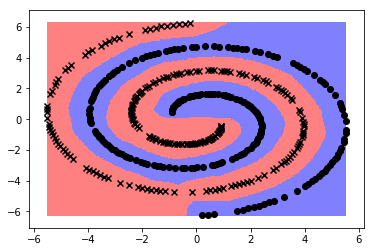

In [15]:
from numpy.matlib import repmat

symbols = ["ko","kx"]
marker_symbols = ['o', 'x']
mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
classvals = np.unique(y_train)

plt.figure()

res=300
xrange = np.linspace(min(x_test[:, 0]), max(x_test[:, 0]),res)
yrange = np.linspace(min(x_test[:, 1]), max(x_test[:, 1]),res)
pixelX = repmat(xrange, res, 1)
pixelY = repmat(yrange, res, 1).T


xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T
logits = model.predict(xTe, steps = 1)
testpreds = logits.argmax(axis = 1)

testpreds[testpreds == 0] = -1
Z = testpreds.reshape(res, res)
#Z[0,0] = 1 # optional: scale the colors correctly
plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)

for idx, c in enumerate(classvals):
    plt.scatter(x_train[y_train == c,0],
                x_train[y_train == c,1],
                marker=marker_symbols[idx],
                color='k')

plt.axis('tight')
plt.show()

